In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import random

In [2]:
def find_closet_centroids(X, centroids):
    res = np.zeros((1,))
    for x in X:
        res = np.append(res, np.argmin(np.sqrt(np.sum((centroids - x) ** 2, axis=1))))
    return res[1:]

In [3]:
def compute_centroids(X, idx):
    K = int(np.max(idx)) + 1
    m = X.shape[0]
    n = X.shape[-1]
    centroids = np.zeros((K, n))
    counts = np.zeros((K, n))
    for i in range(m):
        centroids[int(idx[i])] += X[i]
        counts[int(idx[i])] += 1
    centroids = centroids / counts
    return centroids

In [4]:
def random_initialization(X, K):
    res = np.zeros((1, X.shape[-1]))
    m = X.shape[0]
    rl = []
    while True:
        index = random.randint(0, m)
        if index not in rl:
            rl.append(index)
        if len(rl) >= K:
            break
    for index in rl:
        res = np.concatenate((res, X[index].reshape(1, -1)), axis=0)
    return res[1:]

In [5]:
def cost(X, idx, centrodis):
    c = 0
    for i in range(len(X)):
        c += np.sum((X[i] - centrodis[int(idx[i])]) ** 2)
    c /= len(X)
    return c

In [6]:
def k_means(X, K):
    centroids = random_initialization(X, K)
    centroids_all = [centroids]
    idx = np.zeros((1,))
    last_c = -1
    now_c = -2
    # iterations = 200
    # for i in range(iterations):
    while now_c != last_c: 
        idx = find_closet_centroids(X, centroids)
        last_c = now_c
        now_c = cost(X, idx, centroids)
        centroids = compute_centroids(X, idx)
        centroids_all.append(centroids)
    return idx, centroids_all

In [7]:
def visualizing(X, idx, centroids_all):
    plt.scatter(X[..., 0], X[..., 1], c=idx)
    xx = []
    yy = []
    for c in centroids_all:
        xx.append(c[..., 0])
        yy.append(c[..., 1])
    plt.plot(xx, yy, 'rx--')
    plt.show()

[0. 2. 1.]
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


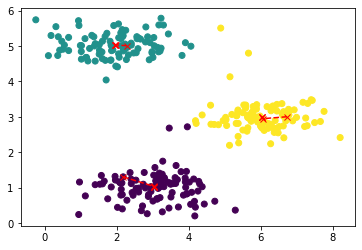

In [8]:
data = sio.loadmat("ex7/ex7data2.mat")
X = data['X']  # (300,2)
init_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closet_centroids(X, init_centroids)
print(idx[0:3])
print(compute_centroids(X, idx))
idx, centroids_all = k_means(X, 3)
visualizing(X, idx, centroids_all)

In [9]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def data_preprocess(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)  # default setting is ddof=0, so it has to be changed here
    return (X - mean) / std, mean, std

In [11]:
def pca(X):
    sigma = X.T.dot(X) / len(X)  # (n,m)x(m,n) (n,n)
    u, s, v = np.linalg.svd(sigma)  # u(n,n) s(n,), v(n,n)
    return u, s, v

In [12]:
# X(m,n), U(n,n)
def project_data(X, U, K):
    return X.dot(U[..., :K])

In [13]:
# Z(m,K), U(n,n)
def reconstruct_data(Z, U, K):
    return Z.dot(U[..., :K].T)

[1.48127391]
[-1.04741883 -1.04741883]


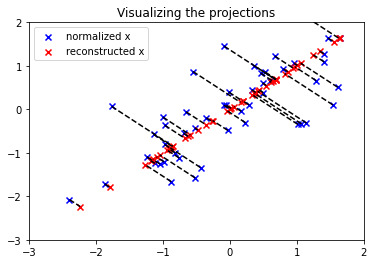

In [14]:
data = sio.loadmat("ex7/ex7data1.mat")
X = data['X']  # (50,2)
normalized_X, _, _ = data_preprocess(X)
u, _, _ = pca(normalized_X)  # (2,2)
Z = project_data(normalized_X, u, 1)
print(Z[0])
rec_X = reconstruct_data(Z, u, 1)
print(rec_X[0])
plt.scatter(normalized_X[..., 0], normalized_X[..., 1], marker='x', c='b', label='normalized x')
plt.scatter(rec_X[..., 0], rec_X[..., 1], marker='x', c='r', label='reconstructed x')
plt.title("Visualizing the projections")
for i in range(len(normalized_X)):
    plt.plot([normalized_X[i][0], rec_X[i][0]], [normalized_X[i][1], rec_X[i][1]], 'k--')
plt.xlim((-3, 2))
plt.ylim((-3, 2))
plt.legend()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def compress(image, colors_num):
    d1, d2, _ = image.shape
    raw_image = image.reshape(d1 * d2, -1)  # into two dimentions
    idx, centroids_all = k_means(raw_image, colors_num)
    colors = centroids_all[-1]
    compressed_image = np.zeros((1, 1))  # construct the image after compression
    for i in range(d1 * d2):
        compressed_image = np.concatenate((compressed_image, idx[i].reshape(1, -1)), axis=0)
    compressed_image = compressed_image[1:].reshape(d1, d2, -1)
    return compressed_image, colors

In [17]:
def compressed_format_to_normal_format(compressed_image, colors):
    d1, d2, _ = compressed_image.shape
    normal_format_image = np.zeros((1, len(colors[0])))
    compressed_image = compressed_image.reshape(d1 * d2, -1)
    for i in range(d1 * d2):
        normal_format_image = np.concatenate((normal_format_image, colors[int(compressed_image[i][0])].reshape(1, -1)),
                                             axis=0)
    normal_format_image = normal_format_image[1:].reshape(d1, d2, -1)
    return normal_format_image

(128, 128, 1) (16, 3)


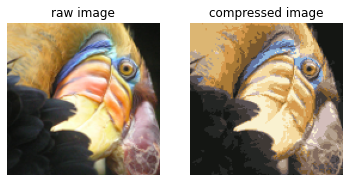

In [18]:
image = plt.imread("ex7/bird_small.png")  # (128,128,3)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("raw image")
plt.subplot(1, 2, 2)
compressed_image, colors = compress(image, 16)
print(compressed_image.shape, colors.shape)
plt.imshow(compressed_format_to_normal_format(compressed_image, colors))
plt.axis('off')
plt.title("compressed image")
plt.show()

In [19]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def visualizing_images(X, d):
    m = len(X)
    n = X.shape[-1]
    s = int(np.sqrt(n))
    for i in range(1, m + 1):
        plt.subplot(m / d, d, i)
        plt.axis('off')
        plt.imshow(X[i - 1].reshape(s, s).T, cmap='Greys_r')
    plt.show()

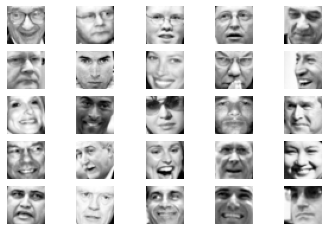

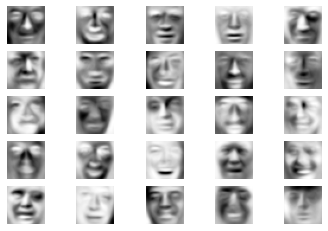

In [21]:
data = sio.loadmat("ex7/ex7faces.mat")
X = data['X']  # (5000,1024)
visualizing_images(X[:25], 5)
nor_X, _, _ = data_preprocess(X)
u, _, _ = pca(nor_X)
Z = project_data(nor_X, u, 36)
rec_X = reconstruct_data(Z, u, 36)
visualizing_images(rec_X[:25], 5)